In [1]:
import numpy as np 
from scipy import stats 

In [3]:
population = stats.norm.rvs(loc = 0, scale = 2, size = 100000)

In [4]:
print(f"population mean: {population.mean()} and std: {population.std()}")

population mean: 0.007474075199012619 and std: 1.9982530761739967


In [79]:
population_variance = float(population.var())

population_mean = float(population.mean()) 

sample_size = 1000

sample = np.random.choice(population, size = sample_size, replace = False)

confidence_level = 0.95

In [ ]:
# we are using z table since we know population variance and two tailed test

z_score = stats.norm.ppf((1 + confidence_level) / 2)

print(f"z score: {z_score}")




z score: 1.959963984540054


z score: number of standard deviation from the mean to obtain 95% of probability mass 

In [18]:
# we need to calculate sampling variance 

sampling_variance = population_variance / sample_size  

print(f"sampling variance : {sampling_variance}")

# standard error 

standard_error = z_score * np.sqrt(sampling_variance) 

print(f"standard error: {standard_error}")

# confidence interval

lower_bound = float(sample.mean() - standard_error)
upper_bound = float(sample.mean() + standard_error)

print(f"confidence interval: {(lower_bound, upper_bound)}")

sampling variance : 0.00399301535643884
standard error: 0.12385073298999516
confidence interval: (-0.17653573053806398, 0.07116573544192632)


In [27]:
def confidence_interval(sample_mean, sample_size, population_variance, confidence_level): 
    critical_value = stats.norm.ppf((1 + confidence_level) / 2) 
    sampling_variance = population_variance / sample_size 
    standard_error = critical_value * np.sqrt(sampling_variance)
    lower_bound = float(sample_mean - standard_error)
    upper_bound = float(sample_mean + standard_error )
    return lower_bound, upper_bound 


In [75]:
# let us validate the meaning of confidence level 

bounds = []

sample_means = [] 

for _ in range(10): 
    sample = np.random.choice(population, size = sample_size, replace = False) 
    sample_mean = float(sample.mean())  
    sample_means.append(sample_mean)
    lower, upper = confidence_interval(sample_mean, sample_size, population_variance, confidence_level)
    bounds.append((lower, upper))

In [ ]:

np.sum([(lower <= population_mean and upper >= population_mean) for lower, upper in bounds]) / len(bounds)  * 100 

np.float64(90.0)

Text(0, 0.5, 'Confidence interval')

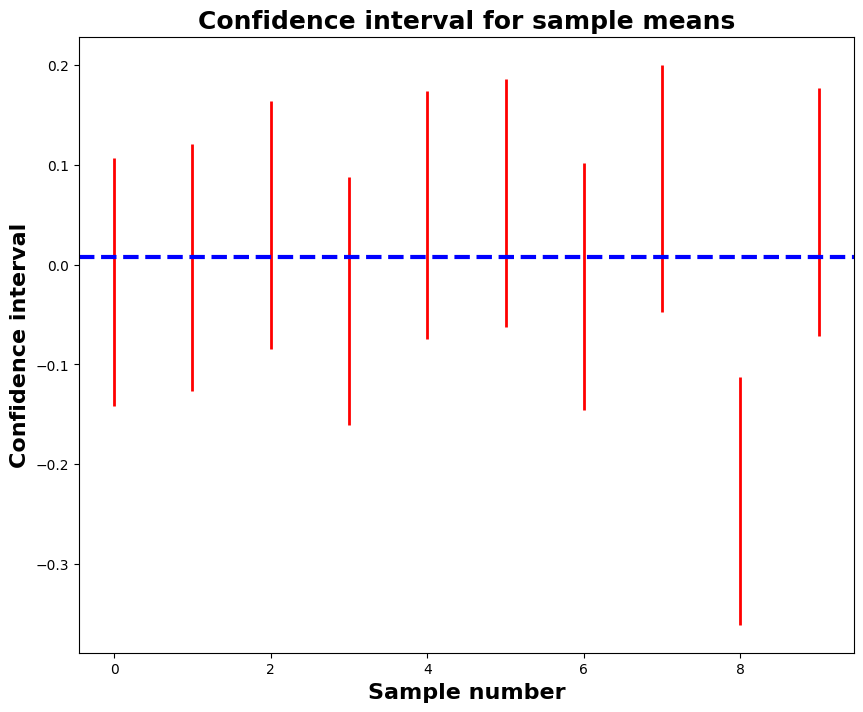

In [77]:
plt.figure(figsize = (10, 8))
for idx, bound in enumerate(bounds): 
    plt.vlines(x = idx, ymin = bound[0], ymax=bound[1], color = "red", linewidth = 2.0)

plt.axhline(y = population_mean, color = "blue", linestyle = "--", linewidth = 3.0)

plt.title("Confidence interval for sample means", fontdict = {'fontsize' : 18, 'fontweight' : 'bold'}) 

plt.xlabel("Sample number", fontdict={'fontsize' : 16, 'fontweight' : 'bold'}) 

plt.ylabel("Confidence interval", fontdict= {'fontsize' : 16, 'fontweight' : 'bold'})